# Keyan's problem.

In [1]:
# Setup iPython environment.
%pylab inline
plt.rc('font',size=20)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Import common libraries.
from __future__ import division
from solvers import *
from utils import *
import ising_eqn_3_sym
import pandas as pd
import os
N = 3

In [10]:
X = pd.read_csv(os.path.expanduser('~')+'/Downloads/data_0.0_0.0_5.0.csv',header=None).values*2.-1
X = pd.read_csv(os.path.expanduser('~')+'/Downloads/data_0.0_0.0_0.0.csv',header=None).values*2.-1

In [11]:
# Define common functions.
@jit(nopython=True)
def calc_observables(X):
    obs = np.zeros(( X.shape[0],X.shape[1]*(X.shape[1]-1)//2+X.shape[1] ))

    for rowIx in xrange(len(X)):
        k = 0
        for i in xrange(X.shape[1]):
            obs[rowIx,i] = X[rowIx,i]
            for j in xrange(i+1,X.shape[1]):
                obs[rowIx,k+X.shape[1]] = (X[rowIx,i]==X[rowIx,j])*2.-1
                k += 1
    return obs

sisjTrue = calc_observables(X).mean(0)

In [12]:
solver = Exact(N,
               calc_observables_multipliers=ising_eqn_3_sym.calc_observables,
               calc_observables=calc_observables)
estMultipliers,soln = solver.solve(constraints=sisjTrue,fsolve_kwargs={})

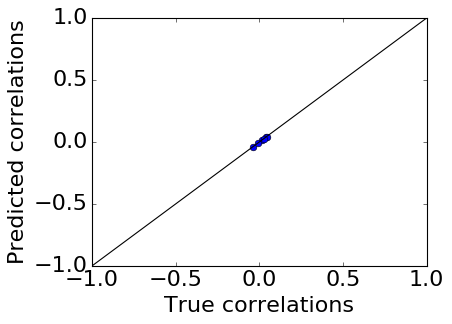

In [13]:
# Plot comparison of model results with the data.
fig,ax = plt.subplots(figsize=(5.4,4))
ax.plot(sisjTrue,ising_eqn_3_sym.calc_observables(estMultipliers),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

In [9]:
estMultipliers

array([-0.027 ,  0.0141, -0.0352, -0.0352,  0.0141, -0.027 ])

In [14]:
estMultipliers

array([ 0.0441, -0.0405,  0.0176,  0.0461, -0.0119,  0.0272])

## Minimum probability flow (MPF)

In [35]:
# Declare and call solver.
solver = MPF(N,calc_observables=calc_observables,adj=adj)
estMultipliers,soln = solver.solve(X)

In [ ]:
# Plot comparison of model results with the data.
fig,ax = plt.subplots(figsize=(10.5,4),ncols=2)
ax[0].plot(sisj,ising_eqn_5_sym.calc_observables(estMultipliers),'o')
ax[0].plot([-1,1],[-1,1],'k-')
ax[0].set(xlabel='True correlations',ylabel='Predicted correlations')

ax[1].plot(hJ,estMultipliers,'o')
ax[1].plot([-1,1],[-1,1],'k-')
ax[1].set(xlabel='True parameters',ylabel='Solved parameters')

fig.subplots_adjust(wspace=.5)